Dataset Head:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Description:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


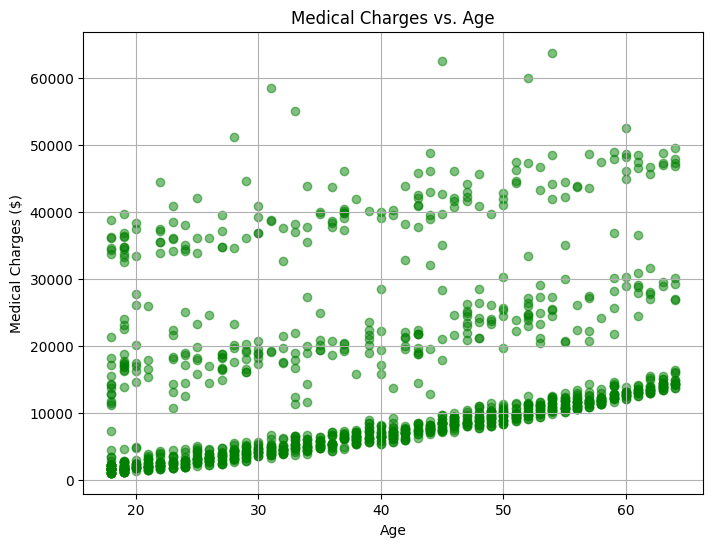


Model training complete!
Intercept (b): 3876.93
Coefficient (m): 240.60

Sample Predictions:
      Actual Charges  Predicted Charges
764       9095.06825       14703.773875
887       5272.17580       12538.404837
890      29330.98315       19275.108511
1293      9301.89355       14944.370434
259      33750.29180        8448.263320


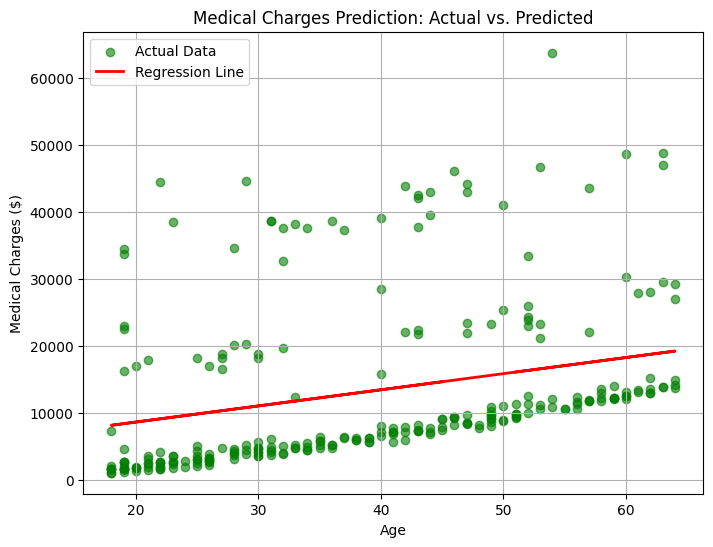


Model Evaluation Metrics:
Mean Absolute Error (MAE): 9173.26
Mean Squared Error (MSE): 135983957.48
R-squared (R²): 0.12


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset from the uploaded CSV file
dataset = pd.read_csv('insurance.csv')

# Display the first 5 rows and a statistical summary
print("Dataset Head:")
print(dataset.head())
print("\nDataset Description:")
print(dataset.describe())

# Plotting the data to see the relationship between age and charges
plt.figure(figsize=(8, 6))
plt.scatter(dataset['age'], dataset['charges'], color='green', alpha=0.5)
plt.title('Medical Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Medical Charges ($)')
plt.grid(True)
plt.show()

# Separate features (X) and target (y)
X = dataset[['age']]
y = dataset['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print(f"\nModel training complete!")
print(f"Intercept (b): {model.intercept_:.2f}")
print(f"Coefficient (m): {model.coef_[0]:.2f}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs. predicted values
predictions_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': y_pred})
print("\nSample Predictions:")
print(predictions_df.head())

# Plot the regression line on the test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='green', label='Actual Data', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Medical Charges Prediction: Actual vs. Predicted')
plt.xlabel('Age')
plt.ylabel('Medical Charges ($)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model's performance
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")